# Load data

In [1]:
import pandas as pd

ORDERS_CSV_PATH = "../data/orders.csv"

orders_df = pd.read_csv(ORDERS_CSV_PATH)
orders_df.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
0,14364873,30000009,2.478101,-72.719360,4200,2017-09-07T20:02:17Z,0
1,14370123,30000058,0.451711,37.754761,4200,2017-09-07T20:13:16Z,0
2,14368534,900003684,2.026072,207.191162,4000,2017-09-07T20:07:23Z,0
3,14370258,900014452,2.671432,1.722656,4400,2017-09-07T20:15:19Z,1
4,14369923,900014085,0.965496,117.429199,3450,2017-09-07T20:12:14Z,1


In [2]:
# Are there missing values?
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146987 entries, 0 to 146986
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           146987 non-null  int64  
 1   store_id           146987 non-null  int64  
 2   to_user_distance   146987 non-null  float64
 3   to_user_elevation  146987 non-null  float64
 4   total_earning      146987 non-null  int64  
 5   created_at         146987 non-null  object 
 6   taken              146987 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 7.9+ MB


# EDA

## Transformations

In [3]:
# Cast created_at to datetime object
from datetime import datetime

torders_df = orders_df.copy()

torders_df['created_at'] = torders_df.apply(
    lambda x: datetime.strptime(x['created_at'], '%Y-%m-%dT%H:%M:%SZ'),
    axis=1
)

torders_df.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
0,14364873,30000009,2.478101,-72.719360,4200,2017-09-07 20:02:17,0
1,14370123,30000058,0.451711,37.754761,4200,2017-09-07 20:13:16,0
2,14368534,900003684,2.026072,207.191162,4000,2017-09-07 20:07:23,0
3,14370258,900014452,2.671432,1.722656,4400,2017-09-07 20:15:19,1
4,14369923,900014085,0.965496,117.429199,3450,2017-09-07 20:12:14,1


In [4]:
torders_df['created_year'] = torders_df.apply(
    lambda x: x['created_at'].year,
    axis=1
)

torders_df['created_month'] = torders_df.apply(
    lambda x: x['created_at'].month,
    axis=1
)

torders_df['created_day'] = torders_df.apply(
    lambda x: x['created_at'].day,
    axis=1
)

torders_df['created_hour'] = torders_df.apply(
    lambda x: x['created_at'].hour,
    axis=1
)

torders_df['created_hhalf'] = torders_df.apply(
    lambda x: int(x['created_at'].minute >= 30),
    axis=1
)

torders_df.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,created_year,created_month,created_day,created_hour,created_hhalf
0,14364873,30000009,2.478101,-72.719360,4200,2017-09-07 20:02:17,0,2017,9,7,20,0
1,14370123,30000058,0.451711,37.754761,4200,2017-09-07 20:13:16,0,2017,9,7,20,0
2,14368534,900003684,2.026072,207.191162,4000,2017-09-07 20:07:23,0,2017,9,7,20,0
3,14370258,900014452,2.671432,1.722656,4400,2017-09-07 20:15:19,1,2017,9,7,20,0
4,14369923,900014085,0.965496,117.429199,3450,2017-09-07 20:12:14,1,2017,9,7,20,0


## Filter

Remove categories that do not seem informative.



In [5]:
# How many values per category?
categories = [
    'created_year',
    'created_month',
    'created_day',
    'created_hour',
    'created_hhalf'
]

for cat in categories:
    unique = torders_df[cat].unique()
    print("{} - {} categories: {}".format(cat, len(unique), sorted(unique)))

created_year - 1 categories: [2017]
created_month - 2 categories: [9, 10]
created_day - 30 categories: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
created_hour - 24 categories: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
created_hhalf - 2 categories: [0, 1]


In [6]:
# Remove:
# - year and month because they do not have enough information
# - Order ID because it is just a sequential number
# - Store ID because it is likely that it does not capture the whole population

tcorders_df = torders_df.drop(
    ['store_id', 'order_id', 'created_at', 'created_year', 'created_month'],
    axis=1
)

tcorders_df.head()

,to_user_distance,to_user_elevation,total_earning,taken,created_day,created_hour,created_hhalf
0,2.478101,-72.719360,4200,0,7,20,0
1,0.451711,37.754761,4200,0,7,20,0
2,2.026072,207.191162,4000,0,7,20,0
3,2.671432,1.722656,4400,1,7,20,0
4,0.965496,117.429199,3450,1,7,20,0


In [7]:
# Balance of the dataset

n_positive = (tcorders_df['taken'] == 1).sum()

print("% positive examples {:.2f}".format(n_positive / len(tcorders_df)))
print("% negative examples {:.2f}".format(1 - n_positive / len(tcorders_df)))

% positive examples 0.92
% negative examples 0.08


## Distributions and correlations

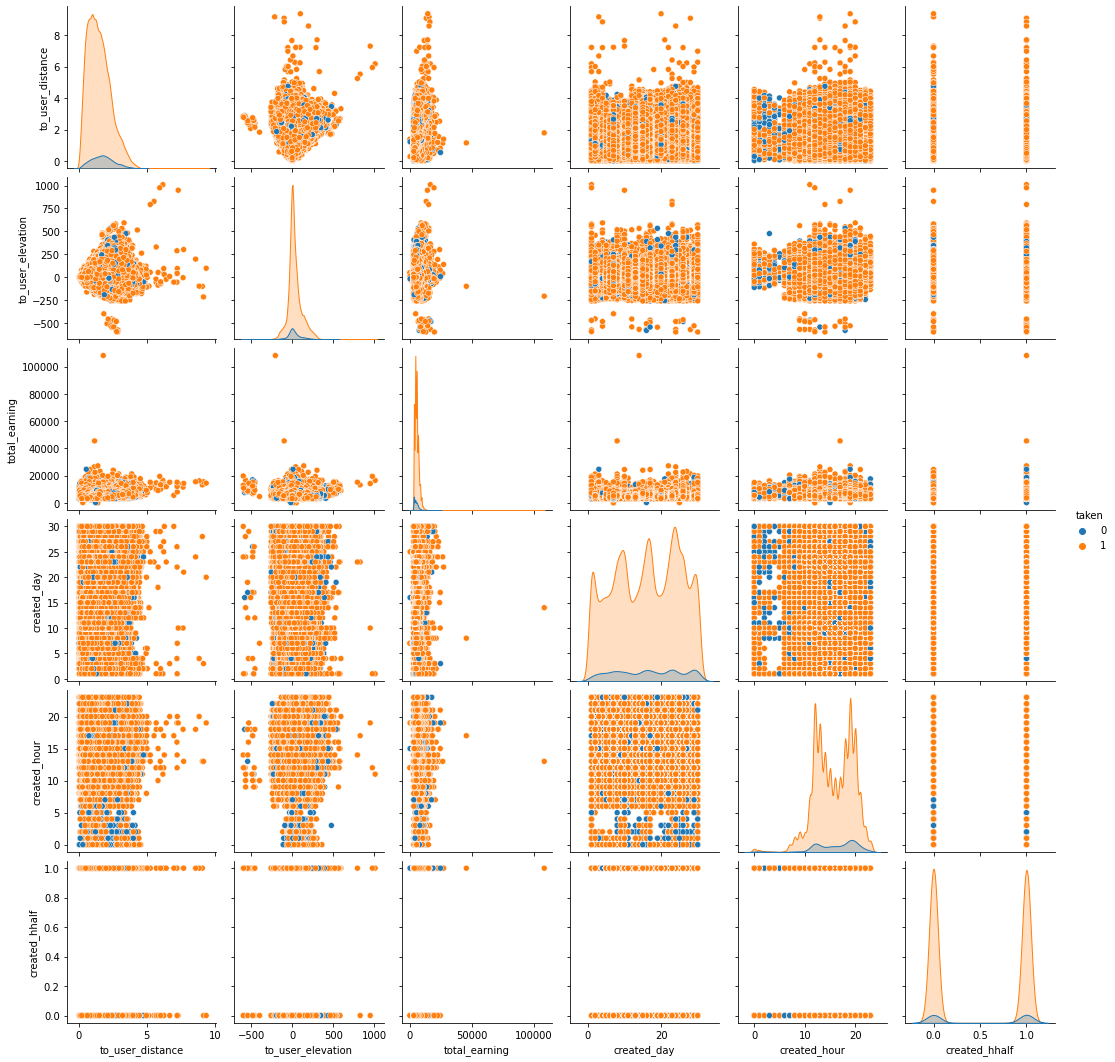

In [8]:
import seaborn as sns

_ = sns.pairplot(tcorders_df, hue="taken")

# Modeling

## Train/test split

In [9]:
X = orders_df.drop(['taken'], axis=1)
y = orders_df['taken']

X.head()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at
0,14364873,30000009,2.478101,-72.719360,4200,2017-09-07T20:02:17Z
1,14370123,30000058,0.451711,37.754761,4200,2017-09-07T20:13:16Z
2,14368534,900003684,2.026072,207.191162,4000,2017-09-07T20:07:23Z
3,14370258,900014452,2.671432,1.722656,4400,2017-09-07T20:15:19Z
4,14369923,900014085,0.965496,117.429199,3450,2017-09-07T20:12:14Z


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y)


In [11]:
# Balance of the dataset (training)

n_positive = (y_train == 1).sum()

print("% training positive examples {:.2f}".format(n_positive / len(y_train)))
print("% training negative examples {:.2f}".format(1 - n_positive / len(y_train)))

% training positive examples 0.92
% training negative examples 0.08


In [12]:
# Balance of the dataset (test)

n_positive = (y_test == 1).sum()

print("% test positive examples {:.2f}".format(n_positive / len(y_test)))
print("% test negative examples {:.2f}".format(1 - n_positive / len(y_test)))

% test positive examples 0.92
% test negative examples 0.08


## Pre-processing pipeline

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from rappiml.transformers import DateTimeTransformer

scaling_features = ['to_user_distance', 'to_user_elevation', 'total_earning']
datetime_features = ['created_at']

preprocessor = ColumnTransformer(
    transformers=[
        ('datetime', DateTimeTransformer(onehot=True), datetime_features),
        ('continuous', StandardScaler(), scaling_features)
    ],
)

# Do not fit this one, it must depend on the train/test split

## Test 1: Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
from rappiml.transformers import DropColumnsTransformer

pipeline = Pipeline(
    steps=[
        ('dropcols', DropColumnsTransformer(cols=['store_id', 'order_id'])),
        ('preprocessing', preprocessor),
        ('classifier', LogisticRegression(max_iter=5000))
   ]
)

In [16]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

clf = GridSearchCV(pipeline, parameters, scoring='roc_auc')
clf.fit(X_train, y_train)
clf.best_score_, clf.best_estimator_

(0.6716176178615079,
 Pipeline(steps=[('dropcols',
                  DropColumnsTransformer(cols=['store_id', 'order_id'])),
                 ('preprocessing',
                  ColumnTransformer(transformers=[('datetime',
                                                   DateTimeTransformer(),
                                                   ['created_at']),
                                                  ('continuous',
                                                   StandardScaler(),
                                                   ['to_user_distance',
                                                    'to_user_elevation',
                                                    'total_earning'])])),
                 ('classifier', LogisticRegression(C=10, max_iter=5000))]))

In [17]:
clf.score(X_test, y_test)

0.6750221629044417

## Test 2: Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(
    steps=[
        ('dropcols', DropColumnsTransformer(cols=['store_id', 'order_id'])),
        ('preprocessing', preprocessor),
        ('classifier', RandomForestClassifier())
   ]
)

In [20]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'classifier__n_estimators': [2, 3, 5, 10, 15, 30, 60, 100]
}

clf = GridSearchCV(pipeline, parameters, scoring='roc_auc')
clf.fit(X_train, y_train)
clf.best_score_, clf.best_estimator_

(0.7041407051629414,
 Pipeline(steps=[('dropcols',
                  DropColumnsTransformer(cols=['store_id', 'order_id'])),
                 ('preprocessing',
                  ColumnTransformer(transformers=[('datetime',
                                                   DateTimeTransformer(),
                                                   ['created_at']),
                                                  ('continuous',
                                                   StandardScaler(),
                                                   ['to_user_distance',
                                                    'to_user_elevation',
                                                    'total_earning'])])),
                 ('classifier', RandomForestClassifier())]))

In [21]:
clf.score(X_test, y_test)

0.7038507008713792

In [22]:
clf.best_params_

{'classifier__n_estimators': 100}

# Saving model

## Retraining best model


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(
    steps=[
        ('dropcols', DropColumnsTransformer(cols=['store_id', 'order_id'])),
        ('preprocessing', preprocessor),
        ('classifier', RandomForestClassifier())
   ]
)

parameters = {
    'classifier__n_estimators': [100]
}

pipeline.fit(X_train, y_train)
pipeline


Pipeline(steps=[('dropcols',
                 DropColumnsTransformer(cols=['store_id', 'order_id'])),
                ('preprocessing',
                 ColumnTransformer(transformers=[('datetime',
                                                  DateTimeTransformer(),
                                                  ['created_at']),
                                                 ('continuous',
                                                  StandardScaler(),
                                                  ['to_user_distance',
                                                   'to_user_elevation',
                                                   'total_earning'])])),
                ('classifier', RandomForestClassifier())])

## Saving best model

In [25]:
import mlflow
import mlflow.sklearn

mlflow.sklearn.save_model(
    pipeline,
    path="../models/orders",
    serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_CLOUDPICKLE
)
